# **Proyecto Final Credit Scoring**
---

* En el presente proyecto se realizara un Modelo que consta de consta de 4 partes: :

1. Analisis EDA y Feature Engineering:

2. Modelo Tradicional: Regresión Logística:

3. Modelo ML: Bagging / Boosting

4. Conclusiones y Artefactos para Productivizar el Modelo

**AUZ**

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('Base de Datos.csv', sep = ";")  # Lectura  de datos
df.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [127]:
df.shape # Dimension de mi data

(150000, 12)

In [128]:
df.dtypes

,0
ID,int64
Default,int64
Prct_uso_tc,float64
Edad,int64
Nro_prestao_retrasados,int64
Prct_deuda_vs_ingresos,float64
Mto_ingreso_mensual,float64
Nro_prod_financieros_deuda,int64
Nro_retraso_60dias,int64
Nro_creditos_hipotecarios,int64


In [129]:
# Ver el porcentaje de valores faltantes por variable
missing = pd.concat([df.isnull().sum(),df.isnull().mean()*100],axis=1)\
          .rename(columns={0:'Numero_Missing',1:'Porcentaje_Missing'})
missing

,Numero_Missing,Porcentaje_Missing
ID,0,0.000000
Default,0,0.000000
Prct_uso_tc,0,0.000000
Edad,0,0.000000
Nro_prestao_retrasados,0,0.000000
Prct_deuda_vs_ingresos,0,0.000000
Mto_ingreso_mensual,29731,19.820667
Nro_prod_financieros_deuda,0,0.000000
Nro_retraso_60dias,0,0.000000
Nro_creditos_hipotecarios,0,0.000000


**Observamos que la variable Mto_ingreso_mensual contiene un gran porcentaje de Missing por lo tanto consideraremos imputarlo analisando la variable, debido a que la Variable Nro_dependiente no contiene muchos missing consideraremos eliminar estos NA debido a que representan menos del 3% de la data total**

In [130]:
df.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [131]:
df = df.drop('ID',axis=1)

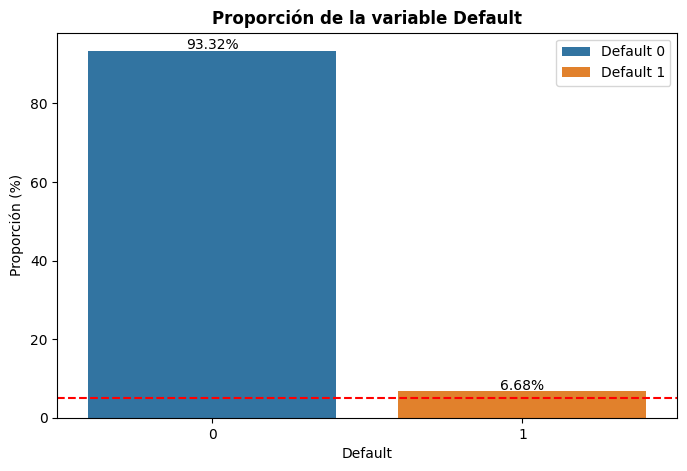

In [132]:
# Calcular la proporción de cada clase en 'Default'
default_proportion = df['Default'].value_counts(normalize=True) * 100

# Crear un DataFrame temporal con las proporciones y clases para facilitar el uso de 'hue'
default_df = pd.DataFrame({
    'Default': default_proportion.index,
    'Proporción': default_proportion.values
})

# Crear el gráfico de barras con colores diferentes para cada clase usando 'hue'
plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e']
bars = sns.barplot(data=default_df, x='Default', y='Proporción', hue='Default', palette=colors, dodge=False)

# Agregar una línea horizontal para el threshold del 5%
plt.axhline(y=5, color='red', linestyle='--', label='Threshold 5%')

# Añadir etiquetas y título
plt.title('Proporción de la variable Default', fontsize=12,weight = 'bold')
plt.xlabel('Default')
plt.ylabel('Proporción (%)')

# Mostrar los valores de las barras
for i in range(len(default_proportion)):
    plt.text(i, default_proportion.values[i] + 0.5, f'{default_proportion.values[i]:.2f}%', ha='center')

# Crear una leyenda personalizada
handles = bars.patches
labels = ['Default 0', 'Default 1']
plt.legend(handles, labels, loc='upper right')

# Mostrar el gráfico
plt.show()


# **EDA**
---

#### **ANALISIS UNIVARIADO**

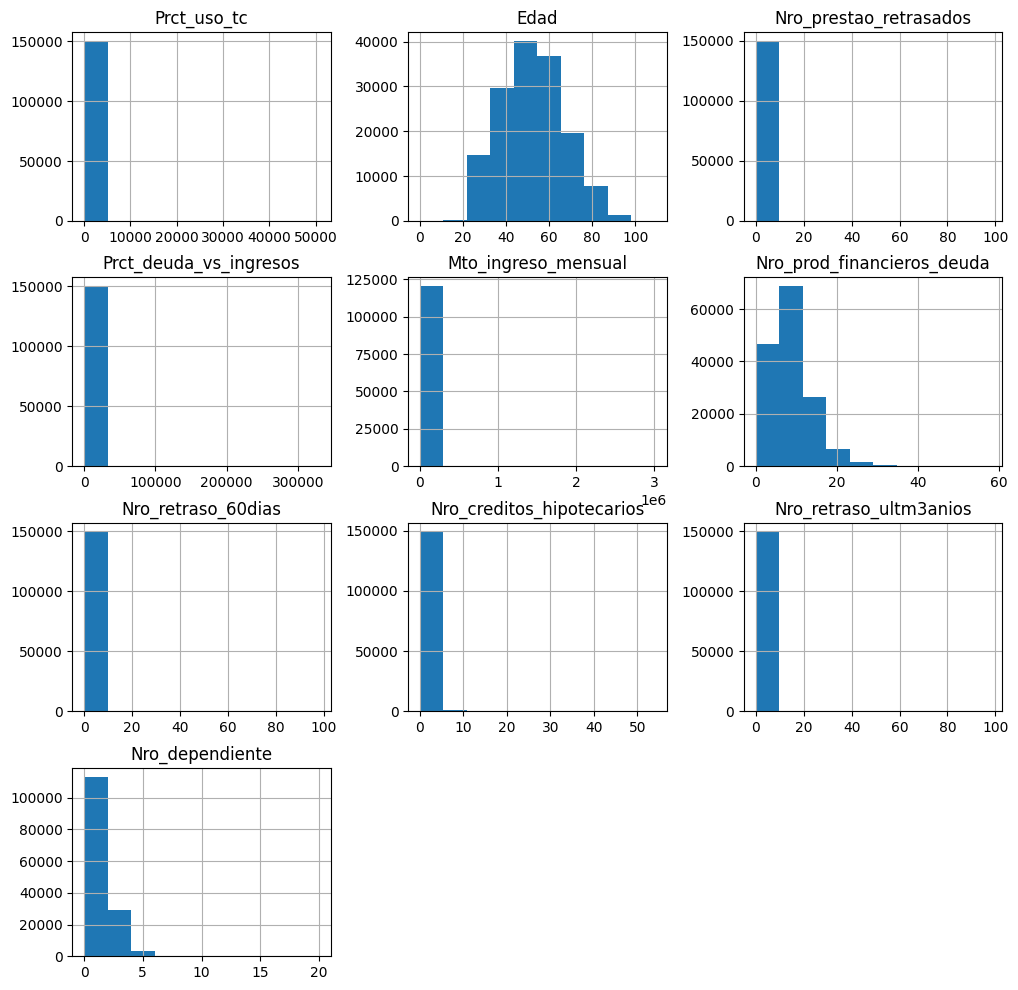

In [133]:
df.drop(columns = ['Default']).hist(figsize = (12, 12))
plt.show()

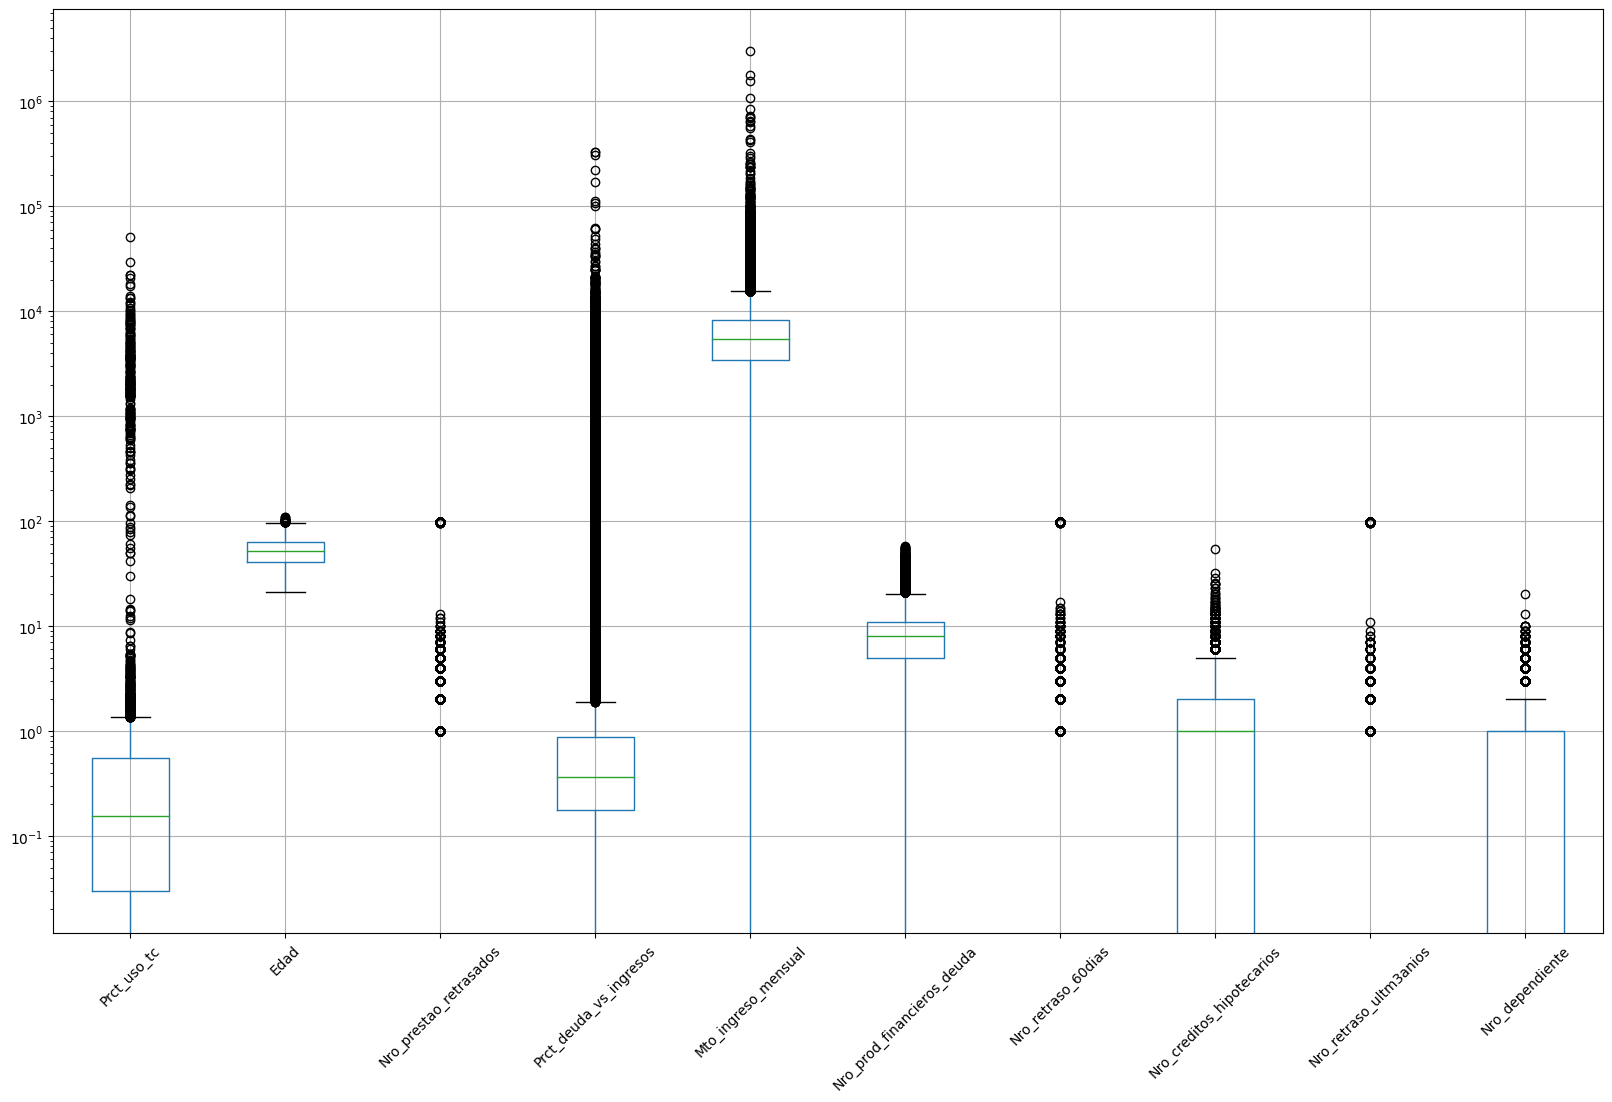

In [134]:
df.drop(columns = ['Default']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

**Observamos muccha presencia de Outliers en variables importante como el Ingreso, DeudaVsIngreso y el Porc de uso de la TC, tendremos que tratar estos valores atipico para que no afecten al modelo**

In [135]:
from scipy import stats

def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-3*iqr
      lim_sup = q3+3*iqr
      n_outliers = len(df[(df[columna]<lim_inf) | (df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers,
          df[columna].dtype
          ))

In [136]:
outliers_col(df)

Default | 10026 | int64
Prct_uso_tc | 339 | float64
Edad | 0 | int64
Nro_prestao_retrasados | 23982 | int64
Prct_deuda_vs_ingresos | 30457 | float64
Mto_ingreso_mensual | 427 | float64
Nro_prod_financieros_deuda | 442 | int64
Nro_retraso_60dias | 8338 | int64
Nro_creditos_hipotecarios | 209 | int64
Nro_retraso_ultm3anios | 7604 | int64
Nro_dependiente | 991 | float64


**Observamos la cantidad de Outliers en las Variables, siendo las mas principales como el Nro_prestao_retrasados, Prct_deuda_vs_ingresos y Nro_retraso_60dias que presentan una gran proporcion de Outlier**

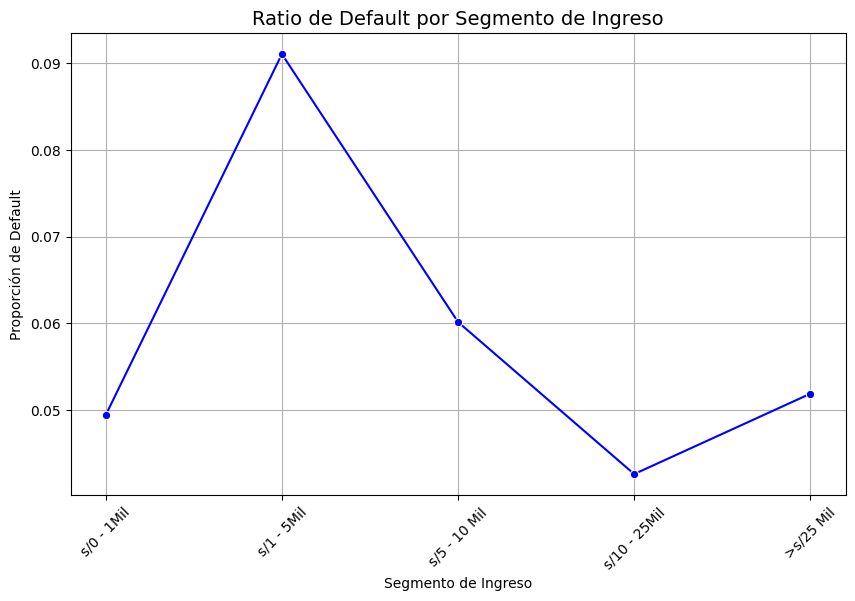

In [137]:
# Definir los rangos y etiquetas de ingreso

rango_ingreso = [0, 1000, 5000, 10000, 25000, float('inf')]
etiquetas = ['s/0 - 1Mil', 's/1 - 5Mil', 's/5 - 10 Mil', 's/10 - 25Mil', '>s/25 Mil']

# Crear la nueva columna con los segmentos de ingreso personalizados
df['Ingreso_segmento'] = pd.cut(df['Mto_ingreso_mensual'], bins=rango_ingreso, labels=etiquetas, right=False)

# Calcular el ratio de default por cada segmento de ingreso
default_ratio_segmento = df.groupby('Ingreso_segmento', observed=False)['Default'].mean()

# Graficar el ratio de default por segmento de ingreso con una línea
plt.figure(figsize=(10, 6))
sns.lineplot(x=default_ratio_segmento.index, y=default_ratio_segmento.values, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título
plt.title('Ratio de Default por Segmento de Ingreso', fontsize=14)
plt.xlabel('Segmento de Ingreso')
plt.ylabel('Proporción de Default')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [138]:
df['Edad'].describe()

,Edad
count,150000.000000
mean,52.295207
std,14.771866
min,0.000000
25%,41.000000
50%,52.000000
75%,63.000000
max,109.000000


**Observamos como el Dafault cae cuando el ingreso aumento excepto en el ultimo segmento, encontrando asi un grupo con un comportamiento irregular al igual que el grupo de ingreso entre 1k a 5k que contiene la mayor cantidad de Default**

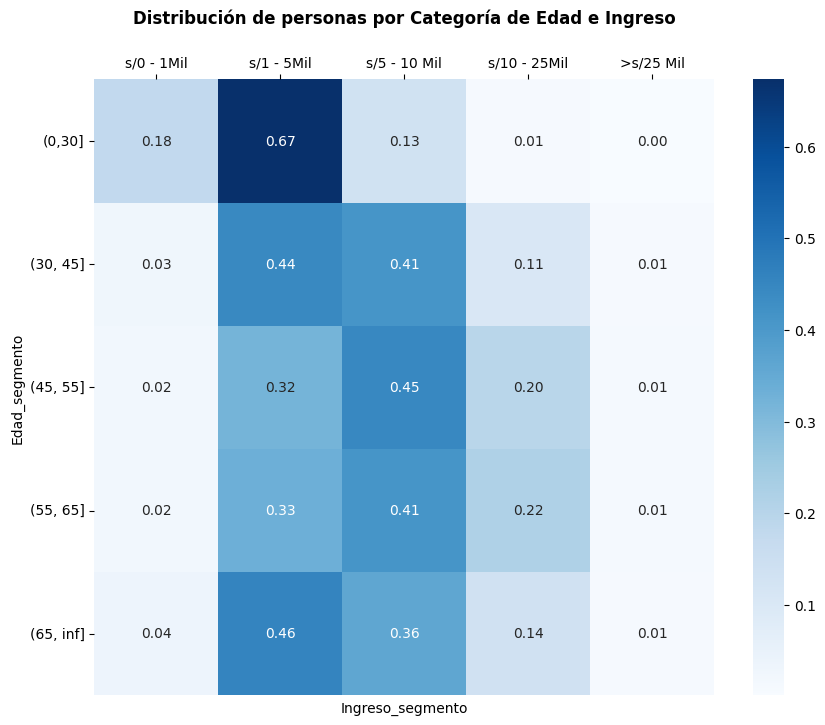

In [139]:
# Creamon la Variable Edad Categorizada para poder analisar con la Variable Ingreso Categorizada

# Definir el rango de edad y las etiquetas corregidas
rango_edad = [0, 30, 45, 55, 65, np.inf]
etiquetas_edad = ['(0,30]', '(30, 45]', '(45, 55]', '(55, 65]', '(65, inf]']

# Crear la nueva columna con los segmentos de edad
df['Edad_segmento'] = pd.cut(df['Edad'], bins=rango_edad, labels=etiquetas_edad, right=False)


summary = df.groupby(['Edad_segmento', 'Ingreso_segmento'], observed=False).size().unstack(fill_value=0)

# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=summary / summary.sum(axis=1).to_numpy()[:, np.newaxis],
                 annot=True,
                 cmap='Blues',
                 fmt='.2f')

# Ajustes visuales
ax.xaxis.tick_top()
ax.set_title('Distribución de personas por Categoría de Edad e Ingreso', pad=40, fontdict={'weight': 'bold'})
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Mostrar gráfico
plt.show()


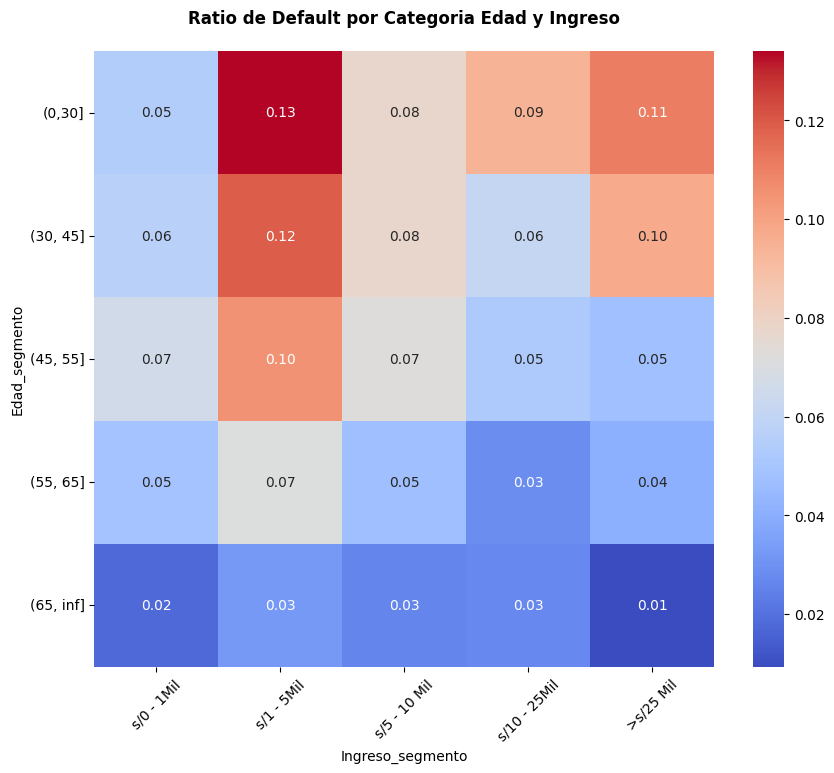

In [140]:
# Crear una tabla pivote para calcular el ratio de default por segmento de edad y de ingreso
default_ratio_heatmap = pd.pivot_table(data=df,
                                       values='Default',
                                       index='Edad_segmento',
                                       columns='Ingreso_segmento',
                                       aggfunc='mean',
                                       observed=False)

# Graficar el heatmap (gráfico de calor)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=default_ratio_heatmap, annot=True, cmap='coolwarm', fmt='.2f')

# Modificar título y etiquetas
ax.set_title('Ratio de Default por Categoria Edad y Ingreso', pad=20, fontdict={'weight': 'bold'})
plt.yticks(rotation=0)  # Mantener las etiquetas de los ejes legibles
plt.xticks(rotation=45)
plt.show()

**Comparando el Ratio de Default, observamos mucha caida de los Prestamos que son de personas en los dos primeros Rangos de Edad, ademas tamien en los que tienen un ingreso entre 1k a 5k y los que tienen ingreso mayor a 25k**

In [141]:
# Creamos la nueva variable segun el Mapa de calor anterior, esta nueva varible ayudara a nuestro modelo

Condicion_Fuerte = ((df['Edad'] <= 45) & (df['Mto_ingreso_mensual'] > 1000)) |\
                   ((df['Edad'] > 45) & (df['Edad'] <= 55) & (df['Mto_ingreso_mensual'] > 1000) & (df['Mto_ingreso_mensual'] <= 10000))

Condicion_Media = ((df['Edad'] <= 45) & (df['Mto_ingreso_mensual'] <= 1000)) |\
                  ((df['Edad'] <= 45) & (df['Edad'] <= 55) & (df['Mto_ingreso_mensual'] <= 10000)& (df['Mto_ingreso_mensual'] <= 25000)) |\
                  ((df['Edad'] > 55) & (df['Edad'] <= 65) &  (df['Mto_ingreso_mensual'] <= 10000)) |\
                  ((df['Edad'] > 55) & (df['Edad'] <= 65) & (df['Mto_ingreso_mensual'] > 25000) )

Conditions = [Condicion_Fuerte, Condicion_Media]

values = ['Fuerte', 'Medio']

df['Riesgo_Ingreso_edad_Categoria'] = np.select(condlist = Conditions,
                                choicelist = values,
                                default = 'Baja')

In [142]:
df.columns

Index(['Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Ingreso_segmento', 'Edad_segmento',
       'Riesgo_Ingreso_edad_Categoria'],
      dtype='object')

In [143]:
# Teniendo nuestras Variables el porcentaje de DeudavsIngreso y el Ingreso Mensual podemos obtner nuestra variable Deuda
df['Deuda'] = df['Prct_deuda_vs_ingresos'] * df['Mto_ingreso_mensual']


# Crear la nueva columna con los segmentos de Deuda personalizados con los mismo Rangos de los Ingresos
df['Deuda_segmento'] = pd.cut(df['Deuda'], bins=rango_ingreso, labels=etiquetas, right=False)

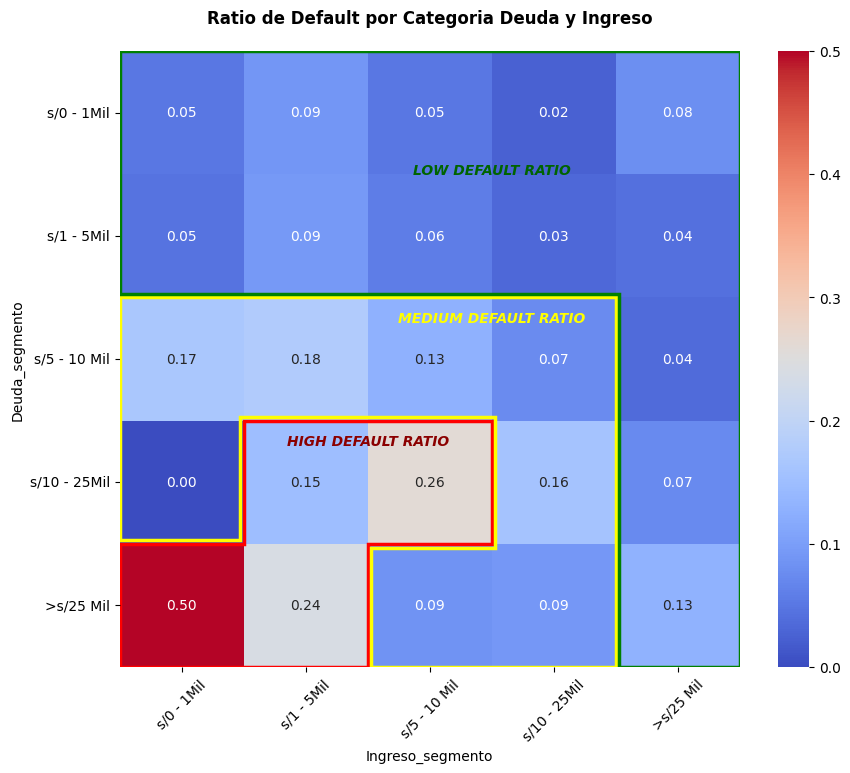

In [144]:
# Crear una tabla pivote para calcular el ratio de default por segmento de edad y de ingreso
default_ratio_heatmap = pd.pivot_table(data=df,
                                       values='Default',
                                       index='Deuda_segmento',
                                       columns='Ingreso_segmento',
                                       aggfunc='mean',
                                       observed=False)

# Graficar el heatmap (gráfico de calor)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=default_ratio_heatmap, annot=True, cmap='coolwarm', fmt='.2f')

# Modificar título y etiquetas
ax.set_title('Ratio de Default por Categoria Deuda y Ingreso', pad=20, fontdict={'weight': 'bold'})
plt.yticks(rotation=0)  # Mantener las etiquetas de los ejes legibles
plt.xticks(rotation=45)

# Puntos de Corte para definir nuestras Categorias de Default dentro del Grafico

high_points = [[0, 4], [0, 5], [2, 5], [2, 4], [3, 4], [3, 3], [1, 3], [1, 4]]
medium_points = [[0, 2], [0, 3.97], [0.97, 3.97], [0.97, 2.97], [3.03, 2.97], [3.03, 4.03], [2.03, 4.03], [2.03, 5], [4, 5], [4,2]]
low_points = [[0, 0], [0, 1.97], [4.03, 1.97], [4.03, 5], [5, 5], [5, 0]]


import matplotlib.patches as mpatches

high_boundary = mpatches.Polygon(xy = high_points,
                                 fill = None,
                                 edgecolor = 'red',
                                 lw = 2.5,
                                 zorder = 1)

medium_boundary = mpatches.Polygon(xy = medium_points,
                                   fill = None,
                                   edgecolor = 'yellow',
                                   lw = 2.5,
                                   zorder = 2)

low_boundary = mpatches.Polygon(xy = low_points,
                                fill = None,
                                edgecolor = 'green',
                                lw = 2.5,
                                zorder = 3)

plt.gca().add_patch(high_boundary)
plt.gca().add_patch(medium_boundary)
plt.gca().add_patch(low_boundary)

ax.text(x = 2,
        y = 3.2,
        s = 'HIGH DEFAULT RATIO',
        ha = 'center',
        weight = 'bold',
        style = 'italic',
        c = 'darkred')

ax.text(x = 3,
        y = 2.2,
        s = 'MEDIUM DEFAULT RATIO',
        ha = 'center',
        weight = 'bold',
        style = 'italic',
        c = 'yellow')

ax.text(x = 3,
        y = 1,
        s = 'LOW DEFAULT RATIO',
        ha = 'center',
        weight = 'bold',
        style = 'italic',
        c = 'darkgreen')
plt.show()

**Habiendo encontrado 3 segmento inportante cruzando nuestras variables categorizadas Ingreso con Deuda procedemos a la creacion de variables que ayudaran al modelo a identificar los Default**

In [145]:
#Creamos la Variable Riesgo Ingreso por Deuda
Condicion_Fuerte = ((df['Deuda'] > 25000) & (df['Mto_ingreso_mensual'] <= 5000)) |\
                  ((df['Deuda'] > 10000) & (df['Deuda'] <= 25000) & (df['Mto_ingreso_mensual'] > 1000) & ((df['Mto_ingreso_mensual'] <= 10000)))

Condicion_Baja = ((df['Deuda'] <= 5000)) |\
                  ((df['Deuda'] > 5000) & (df['Mto_ingreso_mensual'] > 25000))

conditions = [Condicion_Fuerte, Condicion_Baja]

values = ['Alto', 'Bajo']

df['Riesgo_IngresoDeuda_Categoria'] = np.select(condlist = conditions,
                                choicelist = values,
                                default = 'Medio')

# **Preprocessing and Feature Engineering**
---

In [146]:
df.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Ingreso_segmento,Edad_segmento,Riesgo_Ingreso_edad_Categoria,Deuda,Deuda_segmento,Riesgo_IngresoDeuda_Categoria
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,s/5 - 10 Mil,"(45, 55]",Fuerte,7323.197016,s/5 - 10 Mil,Medio
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,s/1 - 5Mil,"(30, 45]",Fuerte,316.878123,s/0 - 1Mil,Bajo
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,s/1 - 5Mil,"(30, 45]",Fuerte,258.914887,s/0 - 1Mil,Bajo
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,s/1 - 5Mil,"(30, 45]",Fuerte,118.963951,s/0 - 1Mil,Bajo
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,>s/25 Mil,"(45, 55]",Baja,1584.975094,s/1 - 5Mil,Bajo


In [147]:
df.isnull().mean()

,0
Default,0.000000
Prct_uso_tc,0.000000
Edad,0.000000
Nro_prestao_retrasados,0.000000
Prct_deuda_vs_ingresos,0.000000
Mto_ingreso_mensual,0.198207
Nro_prod_financieros_deuda,0.000000
Nro_retraso_60dias,0.000000
Nro_creditos_hipotecarios,0.000000
Nro_retraso_ultm3anios,0.000000


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Default", axis=1),
    df["Default"],
    test_size=0.3,
    random_state=0,
    stratify=df["Default"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105000, 16), (45000, 16), (105000,), (45000,))

In [149]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06683809523809524

In [150]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.06684444444444444

In [151]:
# Creamos una lista donde estaran nuestras variables numericas
var_num = X_train.select_dtypes(include=["number"])
var_num.columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Deuda'],
      dtype='object')

In [152]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.columns

Index(['Ingreso_segmento', 'Edad_segmento', 'Riesgo_Ingreso_edad_Categoria',
       'Deuda_segmento', 'Riesgo_IngresoDeuda_Categoria'],
      dtype='object')

In [111]:
pip install feature-engine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 6.3 MB/s eta 0:00:00


## **Tratamiento de Missing**
---

In [162]:
from feature_engine.imputation import CategoricalImputer

# Crear el imputador para las variables categóricas usando el método 'missing'

imputer_cat = CategoricalImputer(imputation_method="missing", variables=['Ingreso_segmento', 'Deuda_segmento'])

# Aplicar el imputador a los datos
imputer_cat.fit(X_train)

CategoricalImputer(variables=['Ingreso_segmento', 'Deuda_segmento'])

In [163]:
X_train_t = imputer_cat.transform(X_train)
X_test_t = imputer_cat.transform(X_test)

In [164]:
X_train_t.isnull().mean()


,0
Prct_uso_tc,0.000000
Edad,0.000000
Nro_prestao_retrasados,0.000000
Prct_deuda_vs_ingresos,0.000000
Mto_ingreso_mensual,0.197705
Nro_prod_financieros_deuda,0.000000
Nro_retraso_60dias,0.000000
Nro_creditos_hipotecarios,0.000000
Nro_retraso_ultm3anios,0.000000
Nro_dependiente,0.026429


In [74]:
#Realizamos una imputacion basado en Arboles de Decision

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

imputer_dt = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0)
imputer_dt.fit(X_train[var_num.columns])


IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                 random_state=0)

In [165]:
X_train_1 = imputer_dt.transform(X_train[var_num.columns])
X_train_1 = pd.DataFrame(X_train_1, columns = var_num.columns)
X_test_1 = imputer_dt.transform(X_test[var_num.columns])
X_test_1 = pd.DataFrame(X_test_1, columns = var_num.columns)

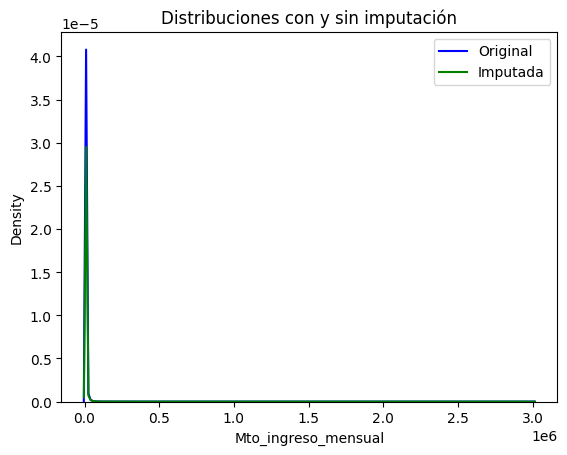

In [166]:
# Grafiquemos las variables imputadas y las originales para "Mto_ingreso_mensual"
fig, ax = plt.subplots()
sns.kdeplot(X_train['Mto_ingreso_mensual'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_1['Mto_ingreso_mensual'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

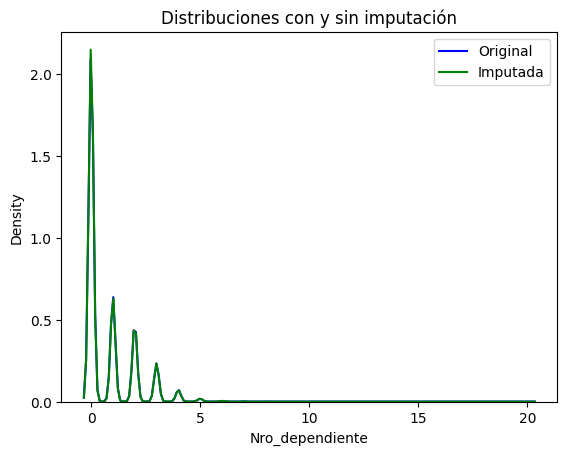

In [78]:
# Grafiquemos las variables imputadas y las originales para "Mto_ingreso_mensual"
fig, ax = plt.subplots()
sns.kdeplot(X_train['Nro_dependiente'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_1['Nro_dependiente'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import  CategoricalImputer


pipe = Pipeline(
    [

        (
            "mode_imputer",
            CategoricalImputer(imputation_method="missing", variables=['Ingreso_segmento', 'Deuda_segmento'])
        )

        ,
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual','Nro_dependiente','Deuda'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)


In [168]:
pipe.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('mode_imputer',
                 CategoricalImputer(variables=['Ingreso_segmento',
                                               'Deuda_segmento'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual',
                                                   'Nro_dependiente',
                                                   'Deuda'])],
                                   verbose_feature_names_out=False))])

In [169]:
X_train_t_p = pipe.transform(X_train)
X_test_t_p = pipe.transform(X_test)

In [170]:
X_train.describe().T.sort_index()


,count,mean,std,min,25%,50%,75%,max
Deuda,84241.0,2120.646885,4451.066459,0.0,596.960205,1624.174707,2875.361031,4.784506e+05
Edad,105000.0,52.257333,14.757197,0.0,41.000000,52.000000,63.000000,1.090000e+02
Mto_ingreso_mensual,84241.0,6692.220486,15406.510842,0.0,3400.000000,5400.000000,8228.000000,3.008750e+06
Nro_creditos_hipotecarios,105000.0,1.020057,1.136004,0.0,0.000000,1.000000,2.000000,5.400000e+01
Nro_dependiente,102225.0,0.759667,1.118985,0.0,0.000000,0.000000,1.000000,2.000000e+01
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.0,0.000000,0.000000,0.000000,9.800000e+01
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,5.800000e+01
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.0,0.000000,0.000000,0.000000,9.800000e+01
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.0,0.000000,0.000000,0.000000,9.800000e+01
Prct_deuda_vs_ingresos,105000.0,349.751674,2006.431906,0.0,0.175941,0.366923,0.864635,3.264420e+05


In [171]:
X_train_t_p.describe().T.sort_index()


,count,mean,std,min,25%,50%,75%,max
Deuda,105000.0,2170.579098,3988.824668,0.0,834.851499,2043.487848,2508.559424,4.784506e+05
Edad,105000.0,52.257333,14.757197,0.0,41.000000,52.000000,63.000000,1.090000e+02
Mto_ingreso_mensual,105000.0,6456.222352,13809.184125,0.0,3915.000000,5447.000000,7400.000000,3.008750e+06
Nro_creditos_hipotecarios,105000.0,1.020057,1.136004,0.0,0.000000,1.000000,2.000000,5.400000e+01
Nro_dependiente,105000.0,0.747898,1.106408,0.0,0.000000,0.000000,1.000000,2.000000e+01
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.0,0.000000,0.000000,0.000000,9.800000e+01
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,5.800000e+01
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.0,0.000000,0.000000,0.000000,9.800000e+01
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.0,0.000000,0.000000,0.000000,9.800000e+01
Prct_deuda_vs_ingresos,105000.0,349.751674,2006.431906,0.0,0.175941,0.366923,0.864635,3.264420e+05


## **Tratamiento de Outliers**
---

In [172]:
outliers_col(X_train_1)

Prct_uso_tc | 237 | float64
Edad | 0 | float64
Nro_prestao_retrasados | 16749 | float64
Prct_deuda_vs_ingresos | 21301 | float64
Mto_ingreso_mensual | 973 | float64
Nro_prod_financieros_deuda | 320 | float64
Nro_retraso_60dias | 5803 | float64
Nro_creditos_hipotecarios | 147 | float64
Nro_retraso_ultm3anios | 5302 | float64
Nro_dependiente | 691 | float64
Deuda | 5710 | float64


In [174]:
X_train_1.describe()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Deuda
count,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,5.819674,52.257333,0.418276,349.751674,5.591212e+03,8.449914,0.263886,1.020057,0.237390,0.745468,10733.830646
std,257.063237,14.757197,4.166897,2006.431906,1.442941e+04,5.153014,4.143683,1.136004,4.128927,1.113064,55262.044678
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029666,41.000000,0.000000,0.175941,2.000000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,755.814504
50%,0.153984,52.000000,0.000000,0.366923,4.514000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1828.547068
75%,0.556816,63.000000,0.000000,0.864635,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,3123.585486
max,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,478450.559160


In [175]:
#Revisando los casos de Outliers vamos a trats las variables Mto_ingreso_mensual, Deuda, Prct_deuda_vs_ingresos

from feature_engine.outliers import Winsorizer

capper_1 = Winsorizer(
    variables=['Mto_ingreso_mensual','Deuda','Prct_deuda_vs_ingresos'],
    capping_method="quantiles",
    tail="both",  # "both"
    fold=0.01,
)
capper_1.fit(X_train_1)

Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
           variables=['Mto_ingreso_mensual', 'Deuda', 'Prct_deuda_vs_ingresos'])

In [176]:
X_train_2 = capper_1.transform(X_train_1)

In [177]:
X_train_2.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Deuda,105000.0,10710.019274,55060.962592,0.0,755.814504,1828.547068,3123.585486,474639.287774
Edad,105000.0,52.257333,14.757197,0.0,41.000000,52.000000,63.000000,109.000000
Mto_ingreso_mensual,105000.0,5278.705679,4541.470141,0.0,2000.000000,4514.000000,7500.000000,23267.330000
Nro_creditos_hipotecarios,105000.0,1.020057,1.136004,0.0,0.000000,1.000000,2.000000,54.000000
Nro_dependiente,105000.0,0.745468,1.113064,0.0,0.000000,0.000000,1.000000,20.000000
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.0,0.000000,0.000000,0.000000,98.000000
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,58.000000
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.0,0.000000,0.000000,0.000000,98.000000
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.0,0.000000,0.000000,0.000000,98.000000
Prct_deuda_vs_ingresos,105000.0,313.921298,900.998051,0.0,0.175941,0.366923,0.864635,4949.020000


In [178]:
X_train_2.columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Deuda'],
      dtype='object')

## **Escalado de las variables**
---

In [179]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_2[var_num.columns])
X_train_3 = scaler.transform(X_train_2[var_num.columns])

In [180]:
X_train_3.describe().T.sort_index()


,count,mean,std,min,25%,50%,75%,max
Deuda,105000.0,3.750984,23.254345,-0.772265,-0.453056,4.801406e-17,0.546944,199.686010
Edad,105000.0,0.011697,0.670782,-2.363636,-0.500000,0.000000e+00,0.500000,2.590909
Mto_ingreso_mensual,105000.0,0.139037,0.825722,-0.820727,-0.457091,0.000000e+00,0.542909,3.409696
Nro_creditos_hipotecarios,105000.0,0.010029,0.568002,-0.500000,-0.500000,0.000000e+00,0.500000,26.500000
Nro_dependiente,105000.0,0.745468,1.113064,0.000000,0.000000,0.000000e+00,1.000000,20.000000
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594


In [181]:
X_train_3.columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Deuda'],
      dtype='object')

In [182]:
pipe_2 = Pipeline(
    [
       (
            "mode_imputer",
            CategoricalImputer(imputation_method="missing", variables=['Ingreso_segmento', 'Deuda_segmento'])
        )

        ,
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual','Nro_dependiente','Deuda'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        ),

        (
            "capper_1",
         Winsorizer(variables=['Mto_ingreso_mensual','Deuda','Prct_deuda_vs_ingresos'], capping_method="quantiles", tail="both", fold=0.01)
        ),

        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados','Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
                                                                   'Nro_prod_financieros_deuda', 'Nro_retraso_60dias','Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
                                                                   'Nro_dependiente', 'Deuda'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [183]:
pipe_2.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('mode_imputer',
                 CategoricalImputer(variables=['Ingreso_segmento',
                                               'Deuda_segmento'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual',
                                                   'Nro_dependiente',
                                                   'Deuda'])],
                                   verbose_feature_names_out=False)),
                ('cappe...
                                       'Prct_deuda_vs_ingresos'])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['Prct_uso_tc', 'Edad',
                                                   'Nro_prestao_retrasados',
                                                   'Prct_deuda_vs_ingresos',
                                                   'Mto_ingreso_mensual',
                                                   'Nro_prod_financieros_deuda',
                                                   'Nro_retraso_60dias',
                                                   'Nro_creditos_hipotecarios',
                                                   'Nro_retraso_ultm3anios',
                                                   'Nro_dependiente',
                                                   'Deuda'])],
                                   verbose_feature_names_out=False))])

In [184]:
X_train_4 = pipe_2.transform(X_train)
X_test_4 = pipe_2.transform(X_test)

In [185]:
X_train_3.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Deuda,105000.0,3.750984,23.254345,-0.772265,-0.453056,4.801406e-17,0.546944,199.686010
Edad,105000.0,0.011697,0.670782,-2.363636,-0.500000,0.000000e+00,0.500000,2.590909
Mto_ingreso_mensual,105000.0,0.139037,0.825722,-0.820727,-0.457091,0.000000e+00,0.542909,3.409696
Nro_creditos_hipotecarios,105000.0,0.010029,0.568002,-0.500000,-0.500000,0.000000e+00,0.500000,26.500000
Nro_dependiente,105000.0,0.745468,1.113064,0.000000,0.000000,0.000000e+00,1.000000,20.000000
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594


In [186]:
X_train_4.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Deuda,105000.0,0.021949,0.976994,-1.220935,-0.722131,-6.792527e-17,0.277869,4.017090
Edad,105000.0,0.011697,0.670782,-2.363636,-0.500000,0.000000e+00,0.500000,2.590909
Mto_ingreso_mensual,105000.0,0.205017,1.102742,-1.562984,-0.439598,0.000000e+00,0.560402,5.094118
Nro_creditos_hipotecarios,105000.0,0.010029,0.568002,-0.500000,-0.500000,0.000000e+00,0.500000,26.500000
Nro_dependiente,105000.0,0.747898,1.106408,0.000000,0.000000,0.000000e+00,1.000000,20.000000
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.000000,0.000000,0.000000e+00,0.000000,98.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594


## **Feature Selection**
---
* **Empecemos discretizando las variables numéricas**

In [187]:
from feature_engine.discretisation import EqualFrequencyDiscretiser


In [188]:
disc1 = EqualFrequencyDiscretiser(q=5,variables=list(var_num.columns),return_boundaries=True)
disc1.fit(X_train_4[var_num.columns])

EqualFrequencyDiscretiser(q=5, return_boundaries=True,
                          variables=['Prct_uso_tc', 'Edad',
                                     'Nro_prestao_retrasados',
                                     'Prct_deuda_vs_ingresos',
                                     'Mto_ingreso_mensual',
                                     'Nro_prod_financieros_deuda',
                                     'Nro_retraso_60dias',
                                     'Nro_creditos_hipotecarios',
                                     'Nro_retraso_ultm3anios',
                                     'Nro_dependiente', 'Deuda'])

In [189]:
X_train_4_numdisc=disc1.transform(X_train_4[var_num.columns])
X_test_4_numdisc=disc1.transform(X_test_4[var_num.columns])

In [190]:
X_train_4_numdisc.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Deuda
70904,"(-0.256, -0.135]","(0.182, 0.591]","(-inf, inf]","(-0.337, -0.115]","(-0.587, -0.0565]","(-0.333, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(0.314, 2.0]","(-0.866, -0.254]"
63717,"(-inf, -0.256]","(0.591, inf]","(-inf, inf]","(5.275, inf]","(-0.0565, 0.0439]","(-0.333, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.254, 0.238]"
88897,"(0.221, 1.029]","(-inf, -0.591]","(-inf, inf]","(-0.337, -0.115]","(-0.587, -0.0565]","(-0.667, -0.333]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.866, -0.254]"
56330,"(-inf, -0.256]","(0.182, 0.591]","(-inf, inf]","(5.275, inf]","(-0.0565, 0.0439]","(-inf, -0.667]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.254, 0.238]"
84825,"(-0.135, 0.221]","(-0.182, 0.182]","(-inf, inf]","(-0.115, 0.145]","(-0.587, -0.0565]","(0.167, 0.667]","(-inf, inf]","(0.0, 0.5]","(-inf, inf]","(2.0, inf]","(-0.254, 0.238]"


In [191]:
tot_train_t =pd.concat([X_train_4_numdisc, X_train_4[var_cat.columns], y_train], axis=1)
tot_train_t.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Deuda,Ingreso_segmento,Edad_segmento,Riesgo_Ingreso_edad_Categoria,Deuda_segmento,Riesgo_IngresoDeuda_Categoria,Default
70904,"(-0.256, -0.135]","(0.182, 0.591]","(-inf, inf]","(-0.337, -0.115]","(-0.587, -0.0565]","(-0.333, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(0.314, 2.0]","(-0.866, -0.254]",s/1 - 5Mil,"(55, 65]",Medio,s/0 - 1Mil,Bajo,0
63717,"(-inf, -0.256]","(0.591, inf]","(-inf, inf]","(5.275, inf]","(-0.0565, 0.0439]","(-0.333, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.254, 0.238]",Missing,"(65, inf]",Baja,Missing,Medio,0
88897,"(0.221, 1.029]","(-inf, -0.591]","(-inf, inf]","(-0.337, -0.115]","(-0.587, -0.0565]","(-0.667, -0.333]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.866, -0.254]",s/5 - 10 Mil,"(30, 45]",Fuerte,s/1 - 5Mil,Bajo,0
56330,"(-inf, -0.256]","(0.182, 0.591]","(-inf, inf]","(5.275, inf]","(-0.0565, 0.0439]","(-inf, -0.667]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 0.314]","(-0.254, 0.238]",Missing,"(55, 65]",Baja,Missing,Medio,0
84825,"(-0.135, 0.221]","(-0.182, 0.182]","(-inf, inf]","(-0.115, 0.145]","(-0.587, -0.0565]","(0.167, 0.667]","(-inf, inf]","(0.0, 0.5]","(-inf, inf]","(2.0, inf]","(-0.254, 0.238]",s/5 - 10 Mil,"(45, 55]",Fuerte,s/1 - 5Mil,Bajo,0


### **Calculamos el WOE por atributo y el IV por variable**

In [192]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [193]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [194]:
getFeatureIV_Importance(tot_train_t,tot_train_t.columns,"Default")


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,IV
0,Prct_uso_tc,1.059561
1,Edad,0.243927
12,Edad_segmento,0.235682
13,Riesgo_Ingreso_edad_Categoria,0.132381
11,Ingreso_segmento,0.075264
4,Mto_ingreso_mensual,0.067177
3,Prct_deuda_vs_ingresos,0.058913
5,Nro_prod_financieros_deuda,0.045930
14,Deuda_segmento,0.030707
9,Nro_dependiente,0.029142


**Nos quedamos con la variables que tengan un IV mayor a 2% y analisaremos aquellas que tengan un IV mayor al 50%**

In [195]:
var_sel = ['Edad','Edad_segmento', 'Riesgo_Ingreso_edad_Categoria',
       'Ingreso_segmento', 'Mto_ingreso_mensual', 'Prct_deuda_vs_ingresos', 'Nro_prod_financieros_deuda',
       'Nro_dependiente', 'Deuda_segmento','Deuda']

In [ ]:
# Veamos como se ven las relaciones entre los atributos de cada variable y el log(odds) o WOE

In [196]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

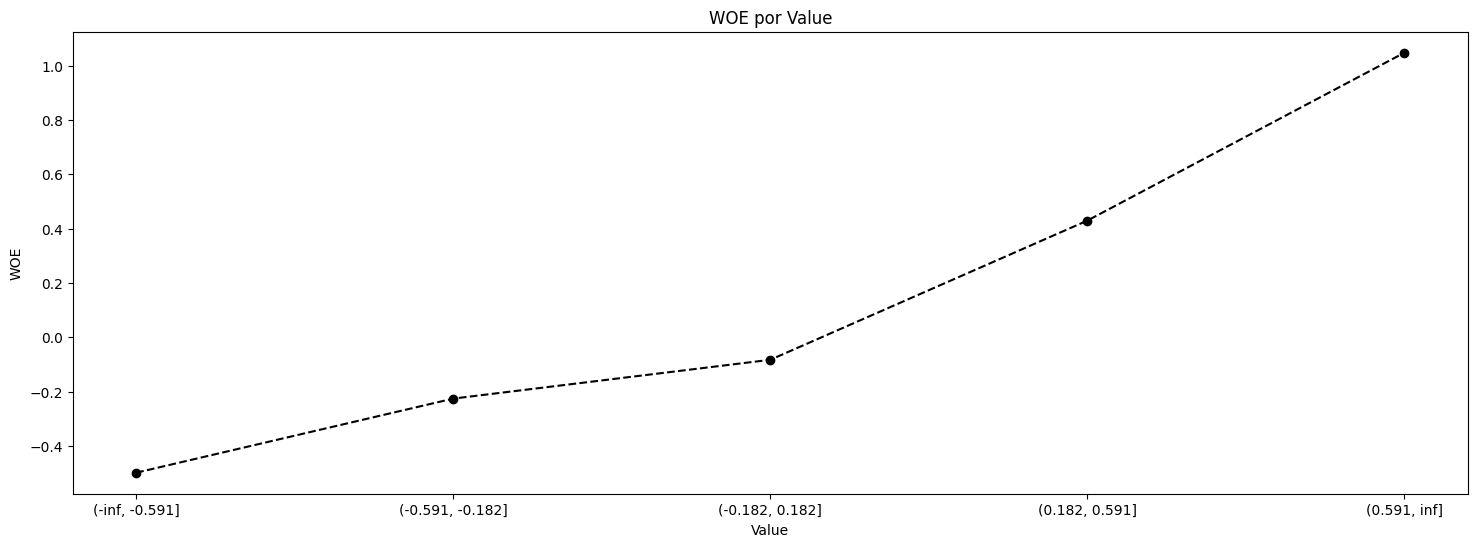

In [197]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'Edad', 'Default')
plot_by_woe(ReporteWoe_v1)

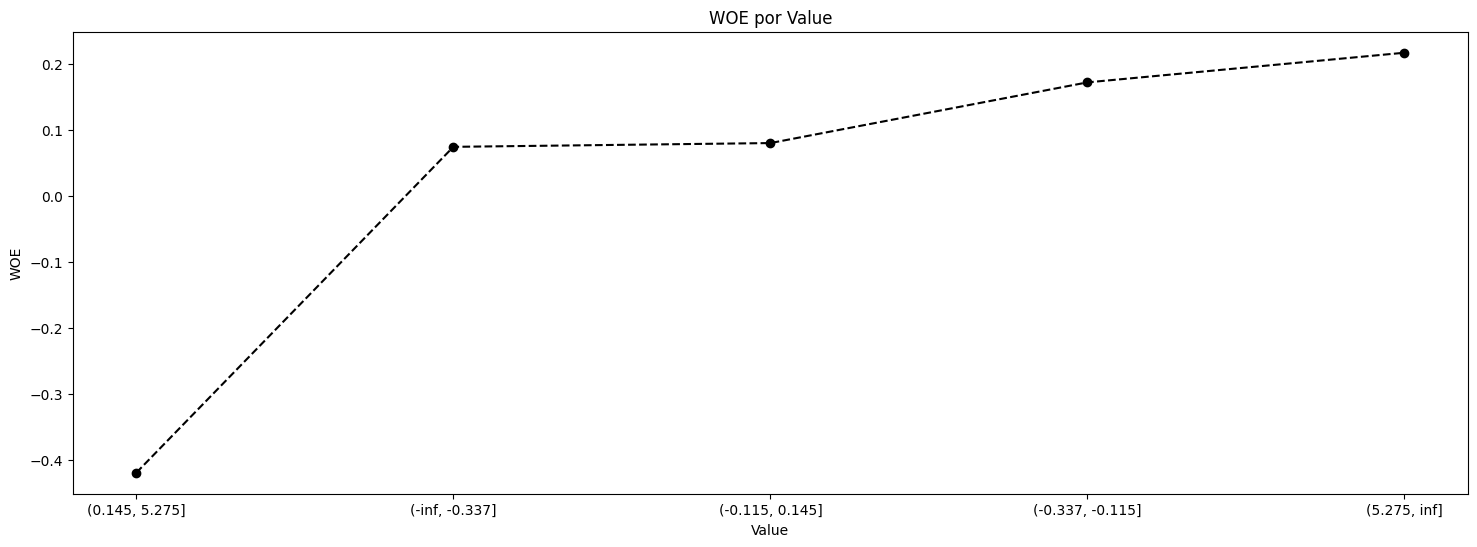

In [198]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'Prct_deuda_vs_ingresos', 'Default')
plot_by_woe(ReporteWoe_v2)

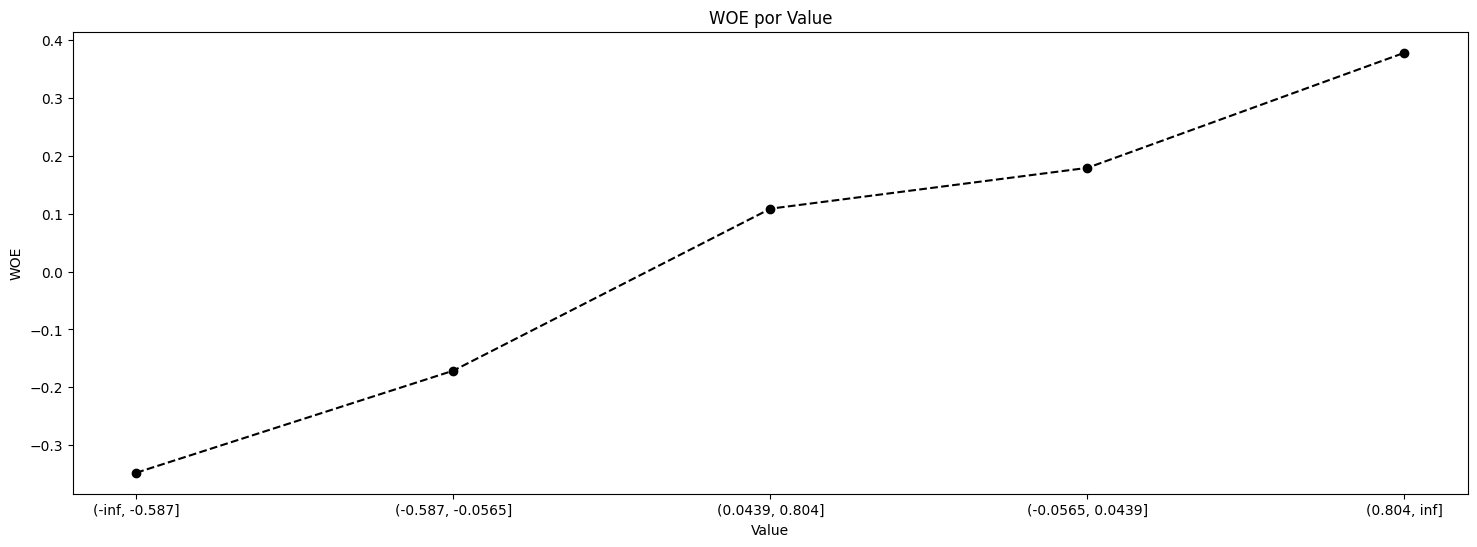

In [199]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'Mto_ingreso_mensual', 'Default')
plot_by_woe(ReporteWoe_v3)

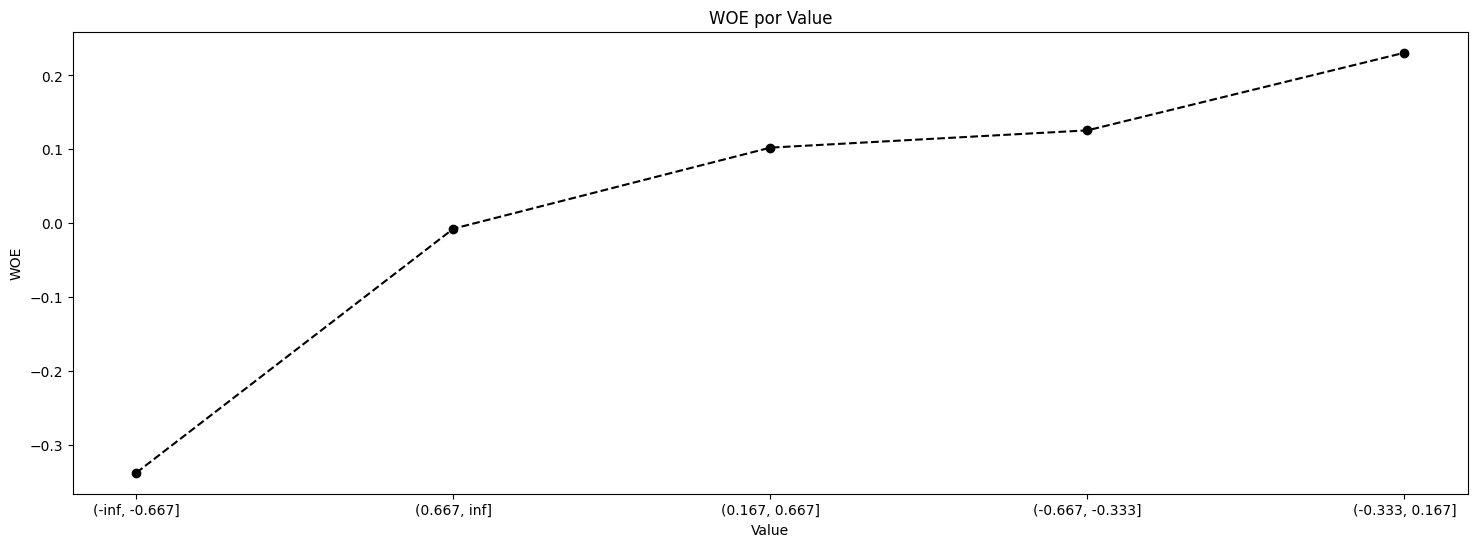

In [200]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'Nro_prod_financieros_deuda', 'Default')
plot_by_woe(ReporteWoe_v4)

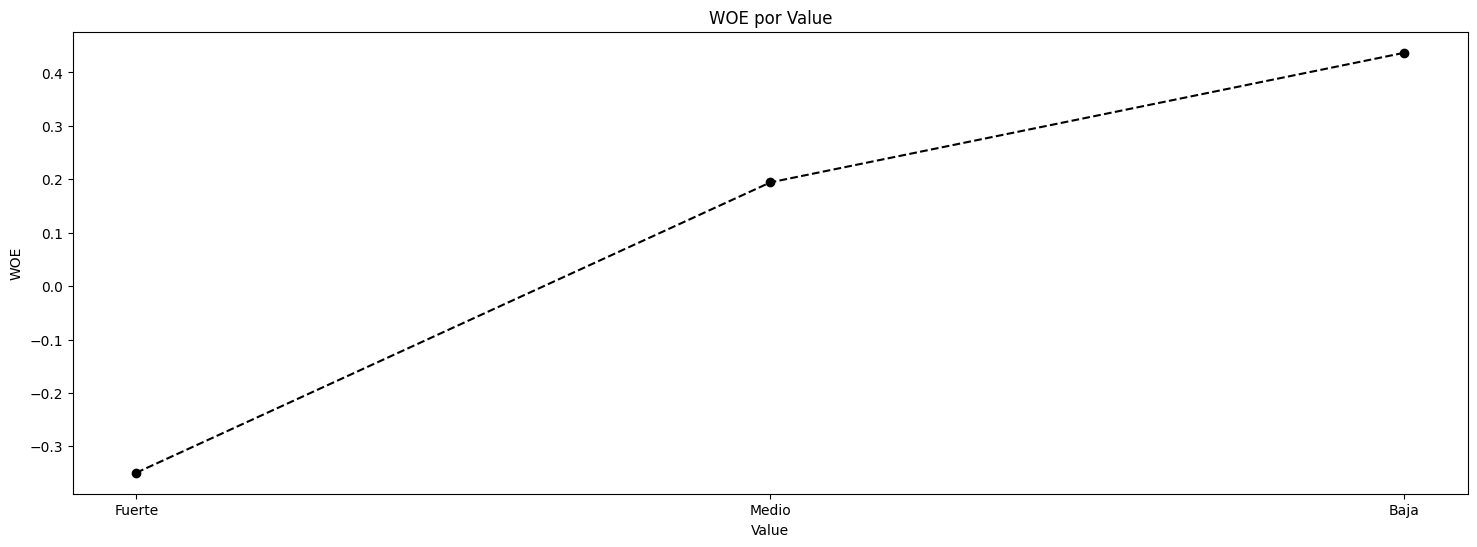

In [201]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'Riesgo_Ingreso_edad_Categoria', 'Default')
plot_by_woe(ReporteWoe_v5)

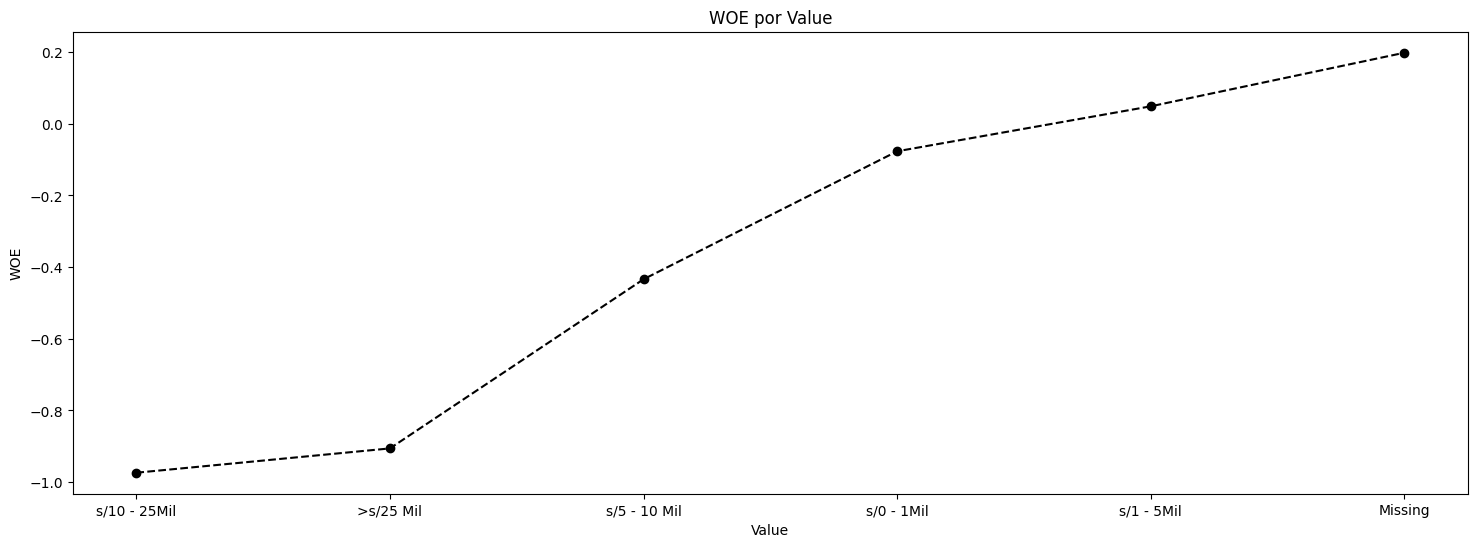

In [202]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'Deuda_segmento', 'Default')
plot_by_woe(ReporteWoe_v6)

In [203]:
# Codificamos las variables categóricas para ingresarlas al modelo
var_sel

['Edad',
 'Edad_segmento',
 'Riesgo_Ingreso_edad_Categoria',
 'Ingreso_segmento',
 'Mto_ingreso_mensual',
 'Prct_deuda_vs_ingresos',
 'Nro_prod_financieros_deuda',
 'Nro_dependiente',
 'Deuda_segmento',
 'Deuda']

In [204]:
sel_vars_cat=['Riesgo_Ingreso_edad_Categoria','Deuda_segmento','Ingreso_segmento','Edad_segmento']
sel_vars_num=['Edad','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Deuda','Nro_prod_financieros_deuda']


In [205]:
from feature_engine.encoding import WoEEncoder


In [206]:
X_train_4[sel_vars_cat].isnull().mean()

,0
Riesgo_Ingreso_edad_Categoria,0.0
Deuda_segmento,0.0
Ingreso_segmento,0.0
Edad_segmento,0.0


In [207]:
encoder_1 = WoEEncoder(variables=sel_vars_cat,
                       fill_value=0) #ignore_format=False
encoder_1.fit(X_train_4[sel_vars_cat], y_train)

WoEEncoder(fill_value=0,
           variables=['Riesgo_Ingreso_edad_Categoria', 'Deuda_segmento',
                      'Ingreso_segmento', 'Edad_segmento'])

In [208]:
X_train_4[sel_vars_cat]

,Riesgo_Ingreso_edad_Categoria,Deuda_segmento,Ingreso_segmento,Edad_segmento
70904,Medio,s/0 - 1Mil,s/1 - 5Mil,"(55, 65]"
63717,Baja,Missing,Missing,"(65, inf]"
88897,Fuerte,s/1 - 5Mil,s/5 - 10 Mil,"(30, 45]"
56330,Baja,Missing,Missing,"(55, 65]"
84825,Fuerte,s/1 - 5Mil,s/5 - 10 Mil,"(45, 55]"
...,...,...,...,...
115229,Baja,s/0 - 1Mil,s/1 - 5Mil,"(65, inf]"
89110,Baja,s/1 - 5Mil,s/1 - 5Mil,"(65, inf]"
93992,Baja,Missing,Missing,"(45, 55]"
20627,Fuerte,s/1 - 5Mil,s/1 - 5Mil,"(45, 55]"


In [211]:
X_train_4_cat_woe_enc = encoder_1.transform(X_train_4[sel_vars_cat])
X_test_4_cat_woe_enc = encoder_1.transform(X_test_4[sel_vars_cat])

In [212]:
X_train_4_cat_woe_enc.head()

,Riesgo_Ingreso_edad_Categoria,Deuda_segmento,Ingreso_segmento,Edad_segmento
70904,-0.194144,0.076842,0.328805,-0.320270
63717,-0.436847,-0.198082,-0.198082,-0.996806
88897,0.349384,-0.048594,-0.101033,0.373993
56330,-0.436847,-0.198082,-0.198082,-0.320270
84825,0.349384,-0.048594,-0.101033,0.137103


In [215]:
encoder_2 = WoEEncoder(variables=sel_vars_num,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_4_numdisc[sel_vars_num], y_train)

WoEEncoder(fill_value=0,
           variables=['Edad', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
                      'Deuda', 'Nro_prod_financieros_deuda'])

In [217]:
X_train_4_num_woe_enc = encoder_2.transform(X_train_4_numdisc[sel_vars_num])
X_test_4_num_woe_enc = encoder_2.transform(X_test_4_numdisc[sel_vars_num])

In [218]:
X_train_4_num_woe_enc.head()

,Edad,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Deuda,Nro_prod_financieros_deuda
70904,-0.429530,-0.172370,0.171165,0.078514,-0.230734
63717,-1.047243,-0.217322,-0.179396,-0.180026,-0.230734
88897,0.498058,-0.172370,0.171165,0.078514,-0.125697
56330,-0.429530,-0.217322,-0.179396,-0.180026,0.337491
84825,0.082572,-0.080310,0.171165,-0.180026,-0.102341


## **Analisis de Correlacion**

In [219]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [220]:
corr_features = correlation(X_train_4[sel_vars_num], 0.5)
len(set(corr_features))

0.5056899852859974 Deuda Mto_ingreso_mensual


1

<Axes: >

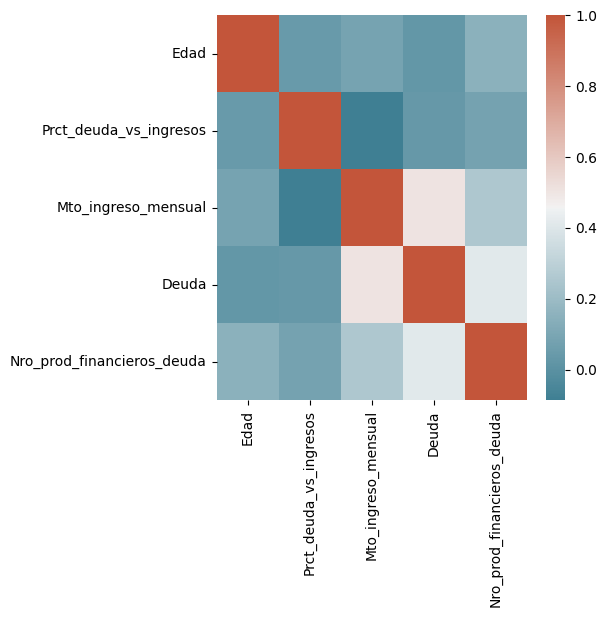

In [221]:
corrmat2 = X_train_4[sel_vars_num].corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat2, cmap=cmap)

In [222]:
sel_vars_2=['Edad','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Riesgo_Ingreso_edad_Categoria',
            'Nro_prod_financieros_deuda','Deuda_segmento','Ingreso_segmento']

In [223]:
sel_vars_num_2=['Edad','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda']


In [227]:
# Actualicemos nuestro pipeline de Feature Engineering antes de iniciar el entrenamiento del modelo

pipe_3 = Pipeline(
    [

        (
            "mode_imputer",
            CategoricalImputer(imputation_method="missing", variables=['Ingreso_segmento', 'Deuda_segmento'])
        )

        ,
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual','Nro_dependiente','Deuda'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        ),

        (
            "capper_1",
         Winsorizer(variables=['Mto_ingreso_mensual','Deuda','Prct_deuda_vs_ingresos'], capping_method="quantiles", tail="both", fold=0.01)
        ),

        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados','Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
                                                                   'Nro_prod_financieros_deuda', 'Nro_retraso_60dias','Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
                                                                   'Nro_dependiente', 'Deuda'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),

        (
            "encoder_1",
            WoEEncoder(variables=[	'Riesgo_Ingreso_edad_Categoria',	'Deuda_segmento',	'Ingreso_segmento'	,'Edad_segmento'], fill_value=0)
        ),
    ]
)

In [228]:
pipe_3.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('mode_imputer',
                 CategoricalImputer(variables=['Ingreso_segmento',
                                               'Deuda_segmento'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual',
                                                   'Nro_dependiente',
                                                   'Deuda'])],
                                   verbose_feature_names_out=False)),
                ('cappe...
                                                   'Nro_prestao_retrasados',
                                                   'Prct_deuda_vs_ingresos',
                                                   'Mto_ingreso_mensual',
                                                   'Nro_prod_financieros_deuda',
                                                   'Nro_retraso_60dias',
                                                   'Nro_creditos_hipotecarios',
                                                   'Nro_retraso_ultm3anios',
                                                   'Nro_dependiente',
                                                   'Deuda'])],
                                   verbose_feature_names_out=False)),
                ('encoder_1',
                 WoEEncoder(fill_value=0,
                            variables=['Riesgo_Ingreso_edad_Categoria',
                                       'Deuda_segmento', 'Ingreso_segmento',
                                       'Edad_segmento']))])

In [229]:
X_train_t_p6 = pipe_3.transform(X_train)
X_test_t_p6 = pipe_3.transform(X_test)

## **Entrenamiento del Modelo**
---

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [231]:
logit = LogisticRegression()
logit.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_logit = logit.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_logit = logit.predict_proba(X_test_t_p6[sel_vars_2])
print('Logit Train roc_auc: ', roc_auc_score(y_train, pred_train_logit[:,1]), 'Logit Train GINI: ', 2*roc_auc_score(y_train, pred_train_logit[:,1])-1)
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)

Logit Train roc_auc:  0.6556401695767468 Logit Train GINI:  0.3112803391534935
Logit Test roc_auc:  0.6602404423600949 Logit Test GINI:  0.3204808847201899


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.9999406467949263 RF Train GINI:  0.9998812935898527
RF Test roc_auc:  0.6474076487910058 RF Test GINI:  0.2948152975820115


In [233]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.7342683845322053 GBC Train GINI:  0.46853676906441066
GBC Test roc_auc:  0.7077116013802528 GBC Test GINI:  0.4154232027605056


# **Optimización de Hiperparámetros**
---

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import RandomizedSearchCV

In [235]:
# Seteamos el modelo
rf = RandomForestClassifier(random_state=39)

# Definimos el espacio de hiperparámetros
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene los mejores hiperparámetros
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [236]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.685894,0.001032,0.680591,0.004111
1,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.681177,0.000905,0.676907,0.004457
2,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.679422,0.001035,0.675846,0.004235
3,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.679684,0.001339,0.675559,0.004047
4,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.679032,0.001124,0.675232,0.004162
5,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.677093,0.001153,0.673910,0.004154
6,"{'max_depth': 2, 'min_samples_split': 0.159193...",0.667249,0.000753,0.665569,0.004575
7,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.667175,0.000712,0.665270,0.004255
8,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.666883,0.001192,0.665074,0.004396
9,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.666767,0.001058,0.665062,0.004549


Text(0.5, 0, 'Hyperparameter space')

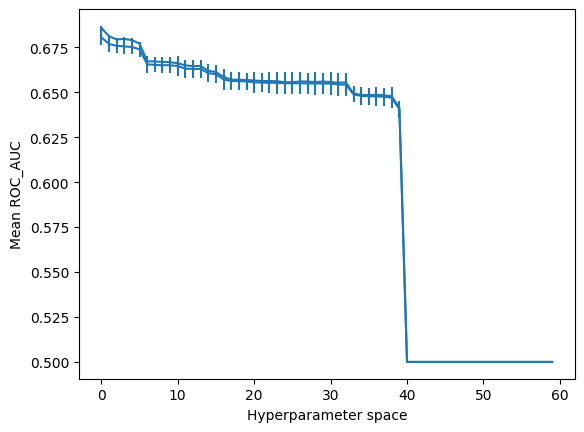

In [237]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [238]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators= 155, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.6857225999350274 RF Train GINI:  0.37144519987005475
RF Test roc_auc:  0.6879813203084783 RF Test GINI:  0.3759626406169565


**CONCLUSIONES:**

**Se puede apreciar una diferencia relevante entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de Gradient Boosting**